In [1]:
# Задание 5

In [2]:
#!pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [4]:
df = pd.read_csv("cars_imputed.csv")

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,...,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke
0,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,10.0,102.0,...,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40
1,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,8.0,115.0,...,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.40
2,1.0,158.0,105.8,192.7,71.4,55.7,2844.0,136.0,8.5,110.0,...,std,four,sedan,fwd,front,ohc,five,mpfi,3.19,3.40
3,1.0,158.0,105.8,192.7,71.4,55.9,3086.0,131.0,8.3,140.0,...,turbo,four,sedan,fwd,front,ohc,five,mpfi,3.13,3.40
4,2.0,192.0,101.2,176.8,64.8,54.3,2395.0,108.0,8.8,101.0,...,std,two,sedan,rwd,front,ohc,four,mpfi,3.50,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,9.5,114.0,...,std,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15
144,-1.0,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,8.7,160.0,...,turbo,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15
145,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,8.8,134.0,...,std,four,sedan,rwd,front,ohcv,six,mpfi,3.58,2.87
146,-1.0,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,23.0,106.0,...,turbo,four,sedan,rwd,front,ohc,six,idi,3.01,3.40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           148 non-null    float64
 1   normalized-losses   148 non-null    float64
 2    wheel-base         148 non-null    float64
 3    length             148 non-null    float64
 4    width              148 non-null    float64
 5    height             148 non-null    float64
 6    curb-weight        148 non-null    float64
 7    engine-size        148 non-null    float64
 8    compression-ratio  148 non-null    float64
 9    horsepower         148 non-null    float64
 10   peak-rpm           148 non-null    float64
 11   city-mpg           148 non-null    float64
 12   highway-mpg        148 non-null    float64
 13    price             148 non-null    float64
 14  make                148 non-null    object 
 15  fuel-type           148 non-null    object 
 16  aspirati

array([[<AxesSubplot:xlabel='symboling', ylabel='symboling'>,
        <AxesSubplot:xlabel='normalized-losses', ylabel='symboling'>,
        <AxesSubplot:xlabel=' wheel-base', ylabel='symboling'>,
        <AxesSubplot:xlabel=' length', ylabel='symboling'>,
        <AxesSubplot:xlabel=' width', ylabel='symboling'>,
        <AxesSubplot:xlabel=' height', ylabel='symboling'>,
        <AxesSubplot:xlabel=' curb-weight', ylabel='symboling'>,
        <AxesSubplot:xlabel=' engine-size', ylabel='symboling'>,
        <AxesSubplot:xlabel=' compression-ratio', ylabel='symboling'>,
        <AxesSubplot:xlabel=' horsepower', ylabel='symboling'>,
        <AxesSubplot:xlabel=' peak-rpm', ylabel='symboling'>,
        <AxesSubplot:xlabel=' city-mpg', ylabel='symboling'>,
        <AxesSubplot:xlabel=' highway-mpg', ylabel='symboling'>,
        <AxesSubplot:xlabel='  price', ylabel='symboling'>],
       [<AxesSubplot:xlabel='symboling', ylabel='normalized-losses'>,
        <AxesSubplot:xlabel='normalized-

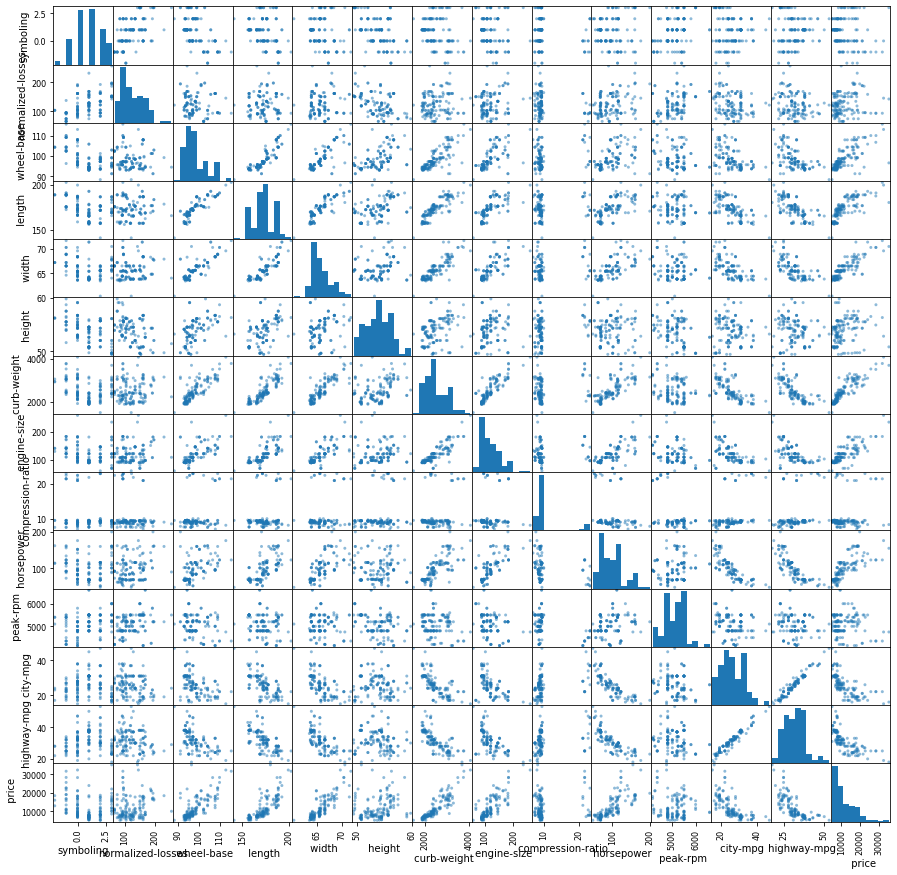

In [8]:
from pandas.plotting import scatter_matrix

num_columns = ['symboling', 'normalized-losses', ' wheel-base', ' length',
               ' width', ' height', ' curb-weight', ' engine-size', ' compression-ratio',
               ' horsepower', ' peak-rpm', ' city-mpg', ' highway-mpg', '  price']

scatter_matrix(df[num_columns], figsize=(15, 15))

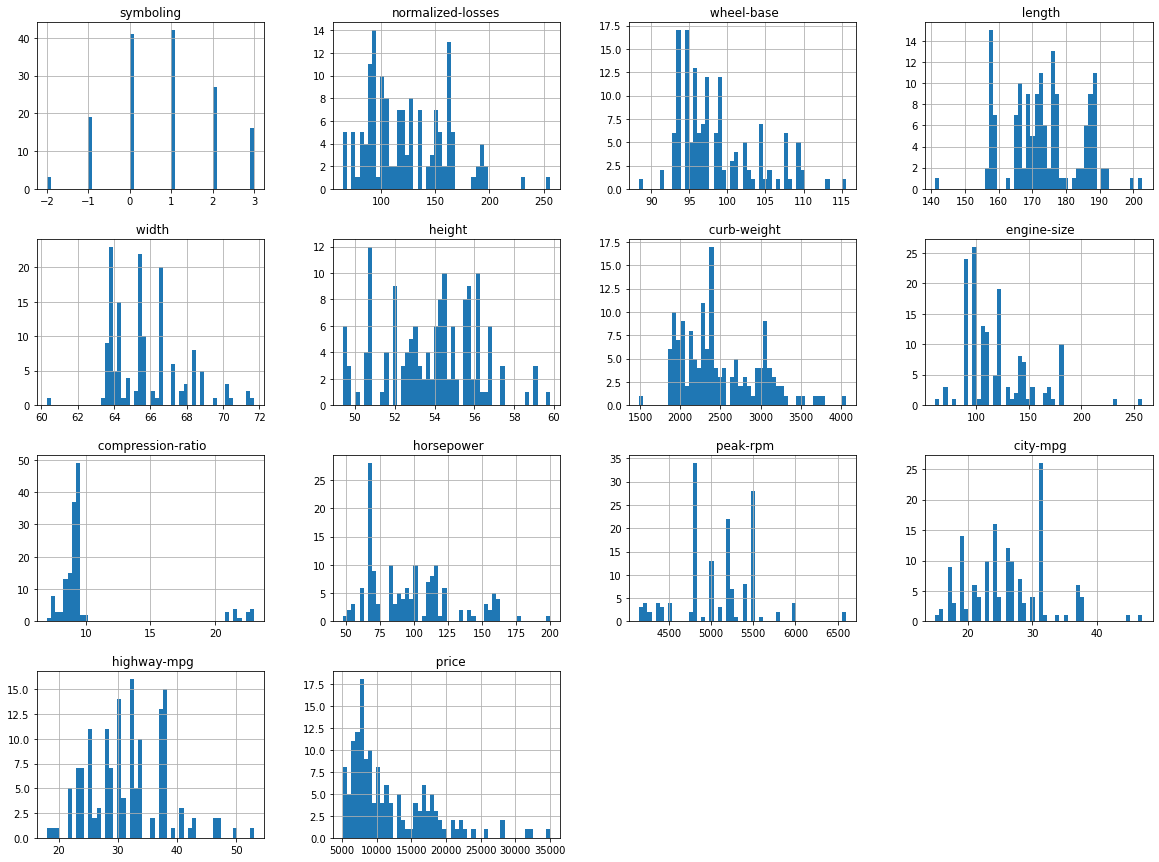

In [9]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [10]:
df_num = df.drop(['make', 'fuel-type', 'aspiration',
                'num-of-doors', 'body-style',
                'drive-wheels', 'engine-location',
                ' engine-type', ' num-of-cylinders',
                ' fuel-system', ' bore', ' stroke'], axis=1)

from sklearn.preprocessing import (MinMaxScaler, PolynomialFeatures)


scale_columns = ['normalized-losses', ' height', ' curb-weight', ' compression-ratio',' peak-rpm']
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_num[scale_columns])
df_num[scale_columns] = minmax_scaler.transform(df_num[scale_columns])

poly_columns = ['normalized-losses', ' height', ' curb-weight', ' compression-ratio',' peak-rpm']
poly_transform = PolynomialFeatures(3, interaction_only=True)
poly_features = poly_transform.fit_transform(df_num[poly_columns])
for index in range(poly_features.shape[1]):
    df_num[f"Poly_column_{index}"] = poly_features[:, index]
df_num.columns

#df_num.describe()

Index(['symboling', 'normalized-losses', ' wheel-base', ' length', ' width',
       ' height', ' curb-weight', ' engine-size', ' compression-ratio',
       ' horsepower', ' peak-rpm', ' city-mpg', ' highway-mpg', '  price',
       'Poly_column_0', 'Poly_column_1', 'Poly_column_2', 'Poly_column_3',
       'Poly_column_4', 'Poly_column_5', 'Poly_column_6', 'Poly_column_7',
       'Poly_column_8', 'Poly_column_9', 'Poly_column_10', 'Poly_column_11',
       'Poly_column_12', 'Poly_column_13', 'Poly_column_14', 'Poly_column_15',
       'Poly_column_16', 'Poly_column_17', 'Poly_column_18', 'Poly_column_19',
       'Poly_column_20', 'Poly_column_21', 'Poly_column_22', 'Poly_column_23',
       'Poly_column_24', 'Poly_column_25'],
      dtype='object')

In [11]:
df_num

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,...,Poly_column_16,Poly_column_17,Poly_column_18,Poly_column_19,Poly_column_20,Poly_column_21,Poly_column_22,Poly_column_23,Poly_column_24,Poly_column_25
0,2.0,0.518325,99.8,176.6,66.2,0.471154,0.329325,109.0,0.18750,102.0,...,0.080425,0.045789,0.134565,0.032006,0.094058,0.053551,0.029093,0.085498,0.048678,0.034025
1,2.0,0.518325,99.4,176.6,66.4,0.471154,0.518231,136.0,0.06250,115.0,...,0.126558,0.015263,0.134565,0.016788,0.148011,0.017850,0.015260,0.134541,0.016226,0.017847
2,1.0,0.486911,105.8,192.7,71.4,0.605769,0.525989,136.0,0.09375,110.0,...,0.155143,0.027652,0.162527,0.024010,0.141122,0.025153,0.029871,0.175571,0.031293,0.027172
3,1.0,0.486911,105.8,192.7,71.4,0.625000,0.619860,131.0,0.08125,140.0,...,0.188636,0.024726,0.167686,0.024523,0.166307,0.021799,0.031477,0.213472,0.027982,0.027751
4,2.0,0.664921,101.2,176.8,64.8,0.471154,0.351823,108.0,0.11250,101.0,...,0.110219,0.035244,0.210985,0.026318,0.157548,0.050378,0.018648,0.111636,0.035697,0.026656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,-1.0,0.157068,109.1,188.8,68.9,0.586538,0.567882,141.0,0.15625,114.0,...,0.052317,0.014395,0.047003,0.013937,0.045508,0.012521,0.052044,0.169941,0.046758,0.045271
144,-1.0,0.157068,109.1,188.8,68.8,0.586538,0.605508,141.0,0.10625,160.0,...,0.055783,0.009788,0.043243,0.010105,0.044642,0.007833,0.037735,0.166705,0.029252,0.030198
145,-1.0,0.157068,109.1,188.8,68.9,0.586538,0.591156,173.0,0.11250,134.0,...,0.054461,0.010364,0.050764,0.010446,0.051163,0.009737,0.039008,0.191058,0.036359,0.036646
146,-1.0,0.157068,109.1,188.8,68.9,0.586538,0.670675,145.0,1.00000,106.0,...,0.061787,0.092126,0.024442,0.105342,0.027948,0.041671,0.393377,0.104365,0.155612,0.177934


In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_num, test_size=0.35, random_state=42)
train_set.head(5)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,...,Poly_column_16,Poly_column_17,Poly_column_18,Poly_column_19,Poly_column_20,Poly_column_21,Poly_column_22,Poly_column_23,Poly_column_24,Poly_column_25
40,2.0,0.502618,93.7,157.3,64.4,0.134615,0.200155,92.0,0.150,68.0,...,0.013543,0.010149,0.037282,0.015090,0.055434,0.041543,0.004042,0.014847,0.011126,0.016543
60,0.0,0.329843,100.4,181.7,66.5,0.548077,0.623351,181.0,0.125,152.0,...,0.112689,0.022597,0.077477,0.025701,0.088118,0.017670,0.042706,0.146419,0.029361,0.033394
24,3.0,0.445026,95.3,169.0,65.7,0.019231,0.346005,70.0,0.150,101.0,...,0.002961,0.001284,0.006462,0.023097,0.116271,0.050406,0.000998,0.005024,0.002178,0.039190
25,3.0,0.445026,95.3,169.0,65.7,0.019231,0.347944,70.0,0.150,101.0,...,0.002978,0.001284,0.006462,0.023227,0.116923,0.050406,0.001004,0.005053,0.002178,0.039410
23,3.0,0.445026,95.3,169.0,65.7,0.019231,0.346005,70.0,0.150,101.0,...,0.002961,0.001284,0.006462,0.023097,0.116271,0.050406,0.000998,0.005024,0.002178,0.039190


In [13]:
Xs = ['normalized-losses', ' wheel-base', ' length', ' width', ' height',
       ' curb-weight', ' engine-size', ' compression-ratio', ' horsepower',
       ' peak-rpm', ' city-mpg', ' highway-mpg', '  price']
Ys = ['symboling']

In [14]:
train_Xs = train_set[Xs]
train_Ys = train_set[Ys]

test_Xs = test_set[Xs]
test_Ys = test_set[Ys]

In [15]:
def MAE(Ys_real, Ys_predict):
    Losses = np.abs(Ys_real - Ys_predict)
    m = len(Ys_real)
    cost_result = 1 / m * np.sum(Losses)
    return cost_result

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

model = LinearRegression()
model.fit(train_Xs, train_Ys)
predictions = model.predict(train_Xs)
print("MAE train:", MAE(train_Ys, predictions))

MAE train: symboling    0.598941
dtype: float64


In [17]:
predictions = model.predict(test_Xs)
print("MAE test:", MAE(test_Ys, predictions))

MAE test: symboling    0.69615
dtype: float64


In [18]:
model = Lasso(alpha=10e-3)
model.fit(train_Xs, train_Ys)
predictions_Lasso = model.predict(train_Xs)
predictions_Lasso = predictions_Lasso.reshape(-1, 1)
print("MAE Lasso Train:", MAE(train_Ys, predictions_Lasso))

predictions_Lasso = model.predict(test_Xs)
predictions_Lasso = predictions_Lasso.reshape(-1, 1)
print("MAE Lasso Test:", MAE(test_Ys, predictions_Lasso))

MAE Lasso Train: symboling    0.607834
dtype: float64
MAE Lasso Test: symboling    0.731234
dtype: float64


In [19]:
model = Ridge(alpha=10e-3)
model.fit(train_Xs, train_Ys)
predictions_Ridge = model.predict(train_Xs)
predictions_Ridge = predictions_Ridge.reshape(-1, 1)
print("MAE Ridge Train:", MAE(train_Ys, predictions_Ridge))

predictions_Ridge = model.predict(test_Xs)
predictions_Ridge = predictions_Ridge.reshape(-1, 1)
print("MAE Ridge Test:", MAE(test_Ys, predictions_Ridge))

MAE Ridge Train: symboling    0.598876
dtype: float64
MAE Ridge Test: symboling    0.696919
dtype: float64
